In [27]:
# Imports
import pandas as pd
import numpy as np


# Jupyter pip install packages (note: %pip is a magic function: https://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-pip)
%pip install xlrd
%pip install matplotlib

import matplotlib.pyplot as plt

You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Import file and view example data
# Note: Based on data exploration, I added some converters to preserve incoming data for certain numeric types
filename = "GE-DMYR-2015-Final-Rates.xls"
df = pd.read_excel(filename, converters={'Zip': lambda x: str(x), 'CIP Code': lambda x: str(x)})

df.head()

,Institution Code (six-digit OPEID),Institution Name,City,State,Zip,Institution Type,CIP Code,CIP Name,Credential Level,Official Program Pass/Zone/Fail,...,Debt-to-Earnings Transitional Rate,Debt-to-Earnings Transitional Rate Numerator,Debt-to-Earnings Transitional Rate Denominator,Debt-to-Earnings Transitional Rate Pass/Fail/Zone,Debt-to-Earnings Transitional Discretionary Income Rate,Debt-to-Earnings Transitional Discretionary Income Rate Numerator,Debt-to-Earnings Transitional Discretionary Income Rate Denominator,Debt-to-Earnings Transitional Discretionary Income Rate Pass/Fail/Zone,Mean Annual Earnings From SSA,Median Annual Earnings from SSA
0,1007,CENTRAL ALABAMA COMMUNITY COLLEGE,ALEXANDER CITY,AL,350100000,PUBLIC 2 TO 3 YEARS,513901,LICENSED PRACTICAL/VOCATIONAL NURSE TRAINING.,01 - UNDERGRADUATE CERTIFICATE,PASS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32617,35061
1,1013,CALHOUN COMMUNITY COLLEGE,TANNER,AL,356710000,PUBLIC 2 TO 3 YEARS,513901,LICENSED PRACTICAL/VOCATIONAL NURSE TRAINING.,01 - UNDERGRADUATE CERTIFICATE,PASS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26219,31071
2,1017,GADSDEN STATE COMMUNITY COLLEGE,GADSDEN,AL,359032269,PUBLIC 2 TO 3 YEARS,120401,"COSMETOLOGY/COSMETOLOGIST, GENERAL.",01 - UNDERGRADUATE CERTIFICATE,PASS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12114,11605
3,1017,GADSDEN STATE COMMUNITY COLLEGE,GADSDEN,AL,359032269,PUBLIC 2 TO 3 YEARS,480508,WELDING TECHNOLOGY/WELDER.,01 - UNDERGRADUATE CERTIFICATE,PASS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29104,29702
4,1017,GADSDEN STATE COMMUNITY COLLEGE,GADSDEN,AL,359032269,PUBLIC 2 TO 3 YEARS,510909,SURGICAL TECHNOLOGY/TECHNOLOGIST.,01 - UNDERGRADUATE CERTIFICATE,PASS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21605,23598


In [3]:
# List of all columns
df.columns.tolist()

['Institution Code (six-digit OPEID)',
 'Institution Name',
 'City',
 'State',
 'Zip',
 'Institution Type',
 'CIP Code',
 'CIP Name',
 'Credential Level',
 'Official Program Pass/Zone/Fail',
 'Official Appeal Decision',
 'Appeal Status',
 'Debt-to-Earnings Annual Rate',
 'Debt-to-Earnings Annual Rate Numerator',
 'Debt-to-Earnings Annual Rate Denominator',
 'Debt-to-Earnings Annual Rate Pass/Fail/Zone',
 'Debt-to-Earnings Discretionary Income Rate',
 'Debt-to-Earnings Discretionary Income Rate Numerator',
 'Debt-to-Earnings Discretionary Income Rate Denominator',
 'Debt-to-Earnings Discretionary Income Rate Pass/Fail/Zone',
 'Debt-to-Earnings Transitional Rate',
 'Debt-to-Earnings Transitional Rate Numerator',
 'Debt-to-Earnings Transitional Rate Denominator',
 'Debt-to-Earnings Transitional Rate Pass/Fail/Zone',
 'Debt-to-Earnings Transitional Discretionary Income Rate',
 'Debt-to-Earnings Transitional Discretionary Income Rate Numerator',
 'Debt-to-Earnings Transitional Discretionary

In [4]:
# Only keep needed columns
df = df[['Institution Name', 'City', 'State', 'Zip', 'Institution Type', 
         'CIP Code', 'CIP Name', 'Credential Level', 'Debt-to-Earnings Annual Rate', 
         'Mean  Annual Earnings From SSA', 'Median Annual Earnings from SSA']]

# Display new df
df.head()

,Institution Name,City,State,Zip,Institution Type,CIP Code,CIP Name,Credential Level,Debt-to-Earnings Annual Rate,Mean Annual Earnings From SSA,Median Annual Earnings from SSA
0,CENTRAL ALABAMA COMMUNITY COLLEGE,ALEXANDER CITY,AL,350100000,PUBLIC 2 TO 3 YEARS,513901,LICENSED PRACTICAL/VOCATIONAL NURSE TRAINING.,01 - UNDERGRADUATE CERTIFICATE,2.50,32617,35061
1,CALHOUN COMMUNITY COLLEGE,TANNER,AL,356710000,PUBLIC 2 TO 3 YEARS,513901,LICENSED PRACTICAL/VOCATIONAL NURSE TRAINING.,01 - UNDERGRADUATE CERTIFICATE,0.78,26219,31071
2,GADSDEN STATE COMMUNITY COLLEGE,GADSDEN,AL,359032269,PUBLIC 2 TO 3 YEARS,120401,"COSMETOLOGY/COSMETOLOGIST, GENERAL.",01 - UNDERGRADUATE CERTIFICATE,0,12114,11605
3,GADSDEN STATE COMMUNITY COLLEGE,GADSDEN,AL,359032269,PUBLIC 2 TO 3 YEARS,480508,WELDING TECHNOLOGY/WELDER.,01 - UNDERGRADUATE CERTIFICATE,0,29104,29702
4,GADSDEN STATE COMMUNITY COLLEGE,GADSDEN,AL,359032269,PUBLIC 2 TO 3 YEARS,510909,SURGICAL TECHNOLOGY/TECHNOLOGIST.,01 - UNDERGRADUATE CERTIFICATE,0,21605,23598


In [5]:
# Check for NaNs
df[df.isna().any(axis=1)]

,Institution Name,City,State,Zip,Institution Type,CIP Code,CIP Name,Credential Level,Debt-to-Earnings Annual Rate,Mean Annual Earnings From SSA,Median Annual Earnings from SSA
5246,"ST. GEORGE'S UNIVERSITY, SCHOOL OF MEDICINE",ST GEORGE'S UNIVERSI,FC,NaN,FOREIGN SCHOOLS,511201,MEDICINE.,07 - FIRST PROFESSIONAL DEGREE,9.60,165847,146016
5296,AMERICAN UNIVERSITY OF THE CARIBBEAN,CUPECOY,FC,NaN,FOREIGN SCHOOLS,511201,MEDICINE.,07 - FIRST PROFESSIONAL DEGREE,6.71,160064,148187
5308,"ROSS UNIVERSITY, SCHOOL OF MEDICINE",PORTSMOUTH,FC,NaN,FOREIGN SCHOOLS,511201,MEDICINE.,07 - FIRST PROFESSIONAL DEGREE,7.17,166936,155442
5450,ROSS UNIVERSITY SCHOOL OF VETERINARY MEDICINE,WEST FARM,FC,NaN,FOREIGN SCHOOLS,512401,VETERINARY MEDICINE.,07 - FIRST PROFESSIONAL DEGREE,19.73,76424,79105
8158,"ST. GEORGE'S UNIVERSITY, SCHOOL OF VETERINARY ...",ST.GEORGE'S,FC,NaN,FOREIGN SCHOOLS,512401,VETERINARY MEDICINE.,07 - FIRST PROFESSIONAL DEGREE,15.46,75296,78601


In [6]:
# There 5 records with NaN in the Zip column. 
# For now, we can just drop these (can be done better with more time/info)

df.dropna(inplace=True)

In [7]:
# Basic info about the DF (columns, data types)
print(df.shape)
print(df.info())

(8632, 11)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8632 entries, 0 to 8636
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Institution Name                 8632 non-null   object
 1   City                             8632 non-null   object
 2   State                            8632 non-null   object
 3   Zip                              8632 non-null   object
 4   Institution Type                 8632 non-null   object
 5   CIP Code                         8632 non-null   object
 6   CIP Name                         8632 non-null   object
 7   Credential Level                 8632 non-null   object
 8   Debt-to-Earnings Annual Rate     8632 non-null   object
 9   Mean  Annual Earnings From SSA   8632 non-null   int64 
 10  Median Annual Earnings from SSA  8632 non-null   int64 
dtypes: int64(2), object(9)
memory usage: 809.2+ KB
None


In [8]:
# Find the non-numeric data point (DROP FOR NOW)
# This could be done better
df[~df['Debt-to-Earnings Annual Rate'].apply(np.isreal)]   # 103 rows will be dropped :(
df['Debt-to-Earnings Annual Rate'] = pd.to_numeric(df['Debt-to-Earnings Annual Rate'], errors='coerce')
df.dropna(inplace=True)

In [9]:
# Percentage of numeric data points that are 0 (can be helpful if the values are too high)
(df[['Debt-to-Earnings Annual Rate', 'Mean  Annual Earnings From SSA', 'Median Annual Earnings from SSA']] == 0).astype(int).sum(axis=0) / len(df)

Debt-to-Earnings Annual Rate       0.170125
Mean  Annual Earnings From SSA     0.000000
Median Annual Earnings from SSA    0.007504
dtype: float64

In [10]:
# Count number of unique values per column (helpful for deciding filters, seeing any issues)
df.nunique()

Institution Name                   2287
City                               1319
State                                52
Zip                                2546
Institution Type                      9
CIP Code                            516
CIP Name                            517
Credential Level                      8
Debt-to-Earnings Annual Rate       1776
Mean  Annual Earnings From SSA     7595
Median Annual Earnings from SSA    7639
dtype: int64

In [11]:
# Get unique values for "filterable" columns (Institution Type & Credential Level)
print(df['Institution Type'].unique())
print(df['Credential Level'].unique())

['PUBLIC 2 TO 3 YEARS' 'PUBLIC 4 YEARS OR MORE'
 'PROPRIETARY 4 YEARS OR MORE' 'PRIVATE, NOT-FOR-PROFIT 4 YEARS OR MORE'
 'PROPRIETARY 2 TO 3 YEARS' 'PRIVATE, NOT-FOR-PROFIT 2 TO 3 YEARS'
 'PUBLIC LESS THAN 2 YEARS' 'PROPRIETARY LESS THAN 2 YEARS'
 'PRIVATE, NOT-FOR-PROFIT LESS THAN 2 YEARS']
['01 - UNDERGRADUATE CERTIFICATE' '08 - GRADUATE CERTIFICATE'
 '05 - MASTERS DEGREE' '03 - BACHELORS DEGREE'
 '04 - POST BACCALAUREATE CERTIFICATE' '02 - ASSOCIATES DEGREE'
 '06 - DOCTORAL DEGREE' '07 - FIRST PROFESSIONAL DEGREE']


In [12]:
# Create unique id field
df.reset_index(inplace=True)
df.rename(columns = {'index':'id'}, inplace=True)

In [22]:
# Rename columns (for FE data stubbing)
df.rename(columns={
    "Institution Name" : "institutionName",
    "City" : "city",
    "State" : "state",
    "Zip" : "zip",
    "Institution Type" : "institutionType",
    "CIP Code" : "cipCode",
    "CIP Name" : "cipName",
    "Credential Level" : "credentialLevel",
    "Debt-to-Earnings Annual Rate" : "debtToEarningsAnnualRate",
    "Mean  Annual Earnings From SSA" : "meanAnnualEarningsFromSsa",
    "Median Annual Earnings from SSA" : "medianAnnualEarningsfromSsa"
}, inplace=True)

array([[<AxesSubplot:title={'center':'debtToEarningsAnnualRate'}>]],
      dtype=object)

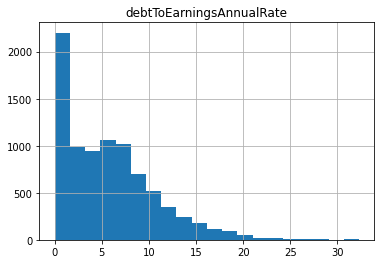

In [25]:
df.hist(column=['debtToEarningsAnnualRate'], bins=20)

array([[<AxesSubplot:title={'center':'meanAnnualEarningsFromSsa'}>]],
      dtype=object)

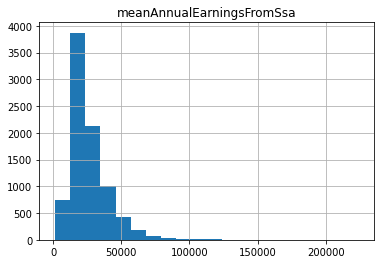

In [26]:
df.hist(column=['meanAnnualEarningsFromSsa'], bins=20)

In [12]:
# Export dummy data file (ONLY 10 records, used for stubbing)
df.head(10).to_json('dummy_data.json', orient='records')